**Based on Zaccone: Python Parallel Programming Cookbook** 

### Thread synchronization with an event

Events are objects that are used for communication between threads. 

A thread waits for a signal while another thread outputs it. 

* An event object manages an internal flag that can be set to true with the set() method 
* and reset to false with the clear() method. 

The wait() method blocks until the flag is true.

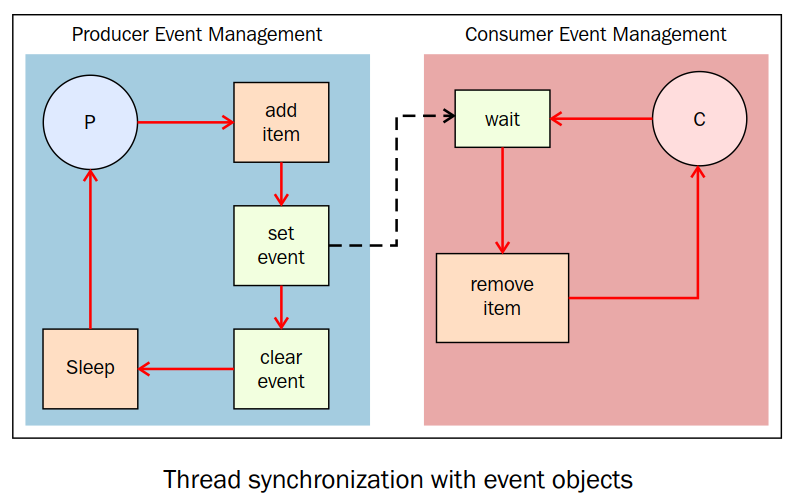

In [1]:
import time
from threading import Thread, Event
import random

items = []
event = Event()


In [2]:
class consumer(Thread):
    def __init__(self, items, event):
        Thread.__init__(self)
        self.items = items
        self.event = event
    
    def run(self):
        while True:
            time.sleep(3)
            # wait till the event flag is true:
            self.event.wait()
            
            # if flag is true, then consume an item from the items list:
            item = self.items.pop()
            print ('Consumer notify : %d popped from list by %s' %(item, self.name))


In [3]:
class producer(Thread):
    def __init__(self, integers, event):
        Thread.__init__(self)
        self.items = items
        self.event = event
    
    def run(self):
        for i in range(10):
            time.sleep(2)
            item = random.randint(0, 256)
            self.items.append(item) 
            print ('Producer notify : item %d appended to list by %s' % (item, self.name))
            print ('Producer notify : event set by %s' % self.name)
            print('Current itmes:', self.items)
            
            # set the event flag to true:
            self.event.set()
            print ('Produce notify : event cleared by %s \n' % self.name)
            
            # set the event flag to false:
            self.event.clear()


In [4]:
t1 = producer(items, event)
t2 = consumer(items, event)
t1.start()
t2.start()
t1.join()
t2.join()



Producer notify : item 200 appended to list by Thread-4
Producer notify : event set by Thread-4
Current itmes: [200]
Produce notify : event cleared by Thread-4 

Producer notify : item 207 appended to list by Thread-4
Producer notify : event set by Thread-4
Current itmes: [200, 207]
Produce notify : event cleared by Thread-4 

Consumer notify : 207 popped from list by Thread-5
Producer notify : item 10 appended to list by Thread-4
Producer notify : event set by Thread-4
Current itmes: [200, 10]
Produce notify : event cleared by Thread-4 

Producer notify : item 159 appended to list by Thread-4
Producer notify : event set by Thread-4
Current itmes: [200, 10, 159]
Produce notify : event cleared by Thread-4 

Consumer notify : 159 popped from list by Thread-5
Producer notify : item 89 appended to list by Thread-4
Producer notify : event set by Thread-4
Current itmes: [200, 10, 89]
Produce notify : event cleared by Thread-4 

Producer notify : item 240 appended to list by Thread-4
Producer

KeyboardInterrupt: 